In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# pip install yfinance


In [5]:
data=yf.download("GOOGL")

C:\Users\unite\AppData\Local\Temp\ipykernel_7324\1689744796.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download("GOOGL")
[*********************100%***********************]  1 of 1 completed


In [6]:
pd.to_datetime(data.index)

DatetimeIndex(['2025-10-20', '2025-10-21', '2025-10-22', '2025-10-23',
               '2025-10-24', '2025-10-27', '2025-10-28', '2025-10-29',
               '2025-10-30', '2025-10-31', '2025-11-03', '2025-11-04',
               '2025-11-05', '2025-11-06', '2025-11-07', '2025-11-10',
               '2025-11-11', '2025-11-12', '2025-11-13', '2025-11-14',
               '2025-11-17', '2025-11-18', '2025-11-19', '2025-11-20'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2025-10-20 to 2025-11-20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   24 non-null     float64
 1   (High, GOOGL)    24 non-null     float64
 2   (Low, GOOGL)     24 non-null     float64
 3   (Open, GOOGL)    24 non-null     float64
 4   (Volume, GOOGL)  24 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 1.1 KB


In [9]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2025-10-20,256.549988,257.329987,254.229996,254.690002,22350200
2025-10-21,250.460007,254.880005,244.149994,254.740005,47312100
2025-10-22,251.690002,256.359985,249.289993,254.369995,35029400
2025-10-23,253.080002,255.039993,251.850006,252.979996,19901400
2025-10-24,259.920013,261.679993,255.320007,256.579987,28655100


In [10]:
data.describe()

Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
count,24.000000,24.000000,24.000000,24.000000,2.400000e+01
mean,276.697913,280.564166,272.917506,276.656874,3.625200e+07
std,13.806414,14.944753,13.741947,14.261186,1.383759e+07
min,250.460007,254.880005,244.149994,252.979996,1.984210e+07
25%,268.819992,270.582512,265.945000,267.017502,2.928428e+07
50%,280.009995,284.654999,277.134995,282.259995,3.132875e+07
75%,284.817497,290.997490,281.570007,286.125000,4.034600e+07
max,300.709900,306.410004,299.700104,304.545013,7.487600e+07


Text(0, 0.5, 'Close Price')

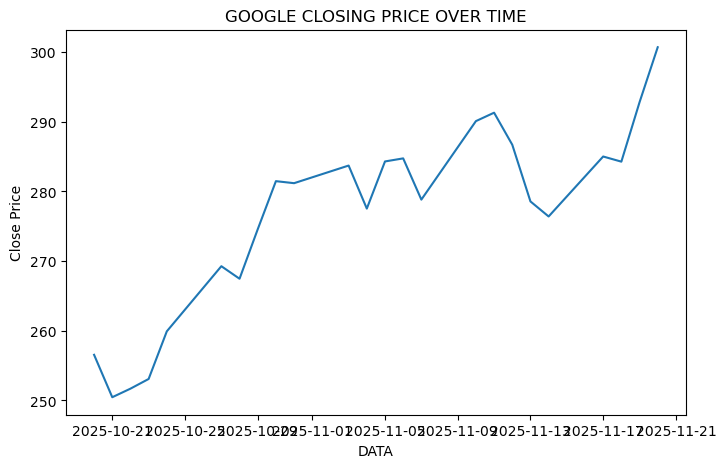

In [11]:
plt.figure(figsize=(8,5))
plt.plot(data["Close"])
plt.title("GOOGLE CLOSING PRICE OVER TIME")
plt.xlabel("DATA")
plt.ylabel("Close Price")


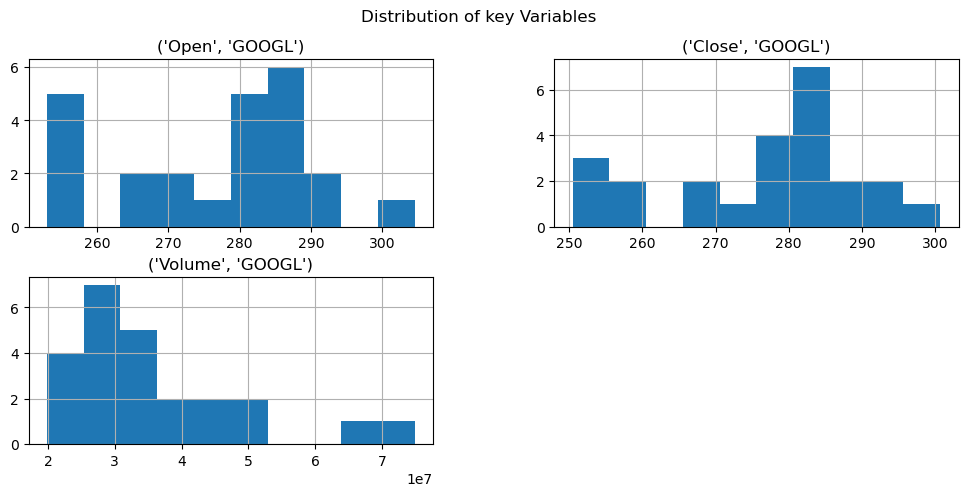

In [12]:
data[["Open","Close","Volume"]].hist(figsize=(12,5))
plt.suptitle("Distribution of key Variables")
plt.show()

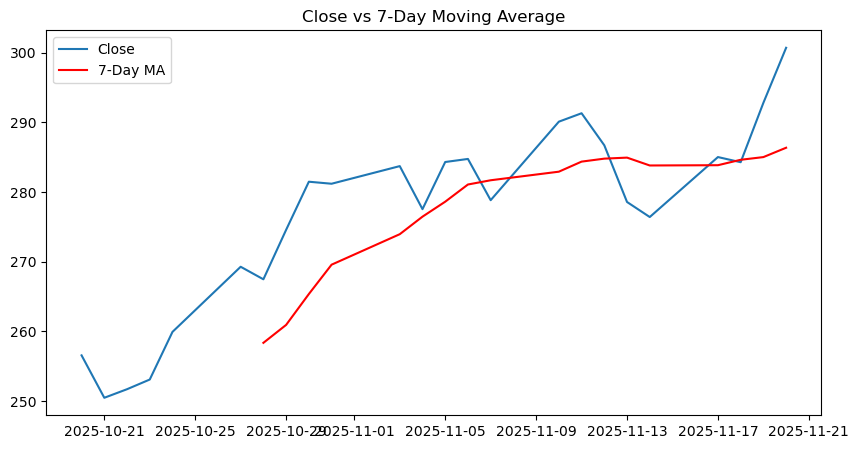

In [13]:
data["MA7"] = data["Close"].rolling(7).mean()

plt.figure(figsize=(10,5))
plt.plot(data["Close"], label="Close")
plt.plot(data["MA7"], label="7-Day MA", color="red")
plt.title("Close vs 7-Day Moving Average")
plt.legend()
plt.show()


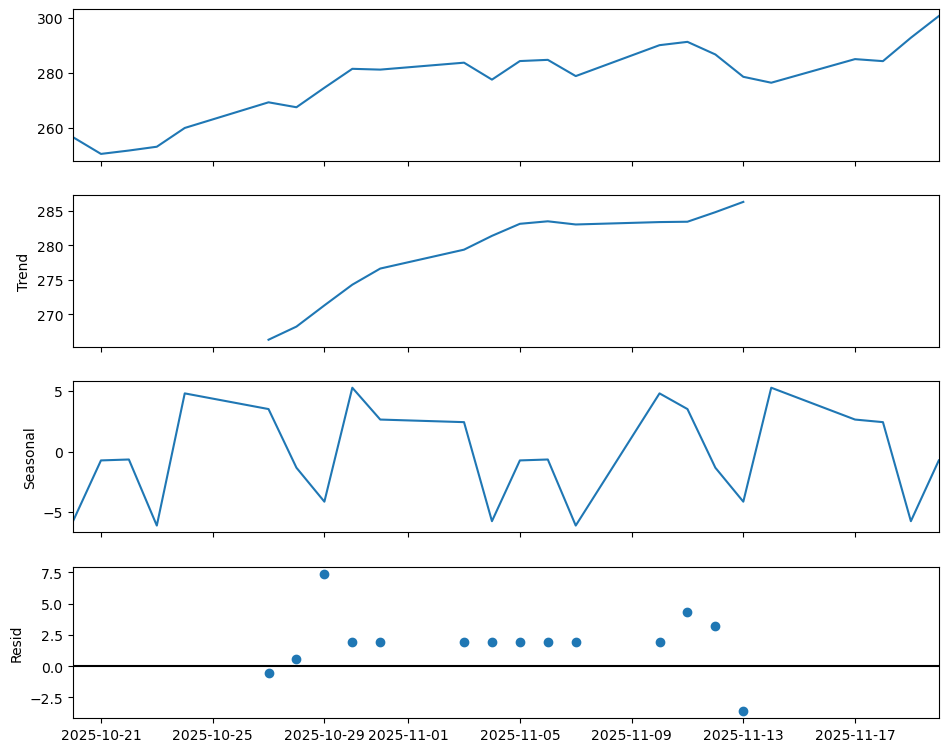

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomp = seasonal_decompose(data["Close"], period=11, model="additive")

fig = decomp.plot()
fig.set_size_inches(10,8)
plt.show()


In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
volume = data["Volume"].dropna()
adf_result = adfuller(volume)

In [17]:
"ADF Statistic:", adf_result[0]



('ADF Statistic:', -3.6317828618964842)

In [18]:
"p-value:", adf_result[1]

('p-value:', 0.005181684092622251)

In [19]:
p = adf_result[1]

if p < 0.05:
    print("Volume IS stationary (reject H0).")
else:
    print("Volume is NOT stationary (fail to reject H0).")


Volume IS stationary (reject H0).


In [20]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

In [21]:
data = yf.download("GOOGL", period="1y")


C:\Users\unite\AppData\Local\Temp\ipykernel_7324\2288976096.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("GOOGL", period="1y")
[*********************100%***********************]  1 of 1 completed


In [22]:
train = data["Close"][:-30]
test = data["Close"][-30:]

In [23]:
model = ARIMA(train, order=(1,0,0))
model_fit = model.fit()

print(model_fit.summary())


C:\Users\unite\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\unite\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\unite\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  GOOGL   No. Observations:                  221
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -609.631
Date:                Thu, 20 Nov 2025   AIC                           1225.262
Time:                        21:26:14   BIC                           1235.457
Sample:                             0   HQIC                          1229.378
                                - 221                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        198.4851     27.503      7.217      0.000     144.579     252.391
ar.L1          0.9927      0.009    115.460      0.000       0.976       1.010
sigma2        14.2961      0.774     18.463      0.0

In [24]:
forecast = model_fit.forecast(steps=30)
forecast


C:\Users\unite\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\unite\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


221    241.215213
222    240.902729
223    240.592531
224    240.284601
225    239.978923
226    239.675480
227    239.374257
228    239.075236
229    238.778402
230    238.483738
231    238.191230
232    237.900861
233    237.612615
234    237.326477
235    237.042431
236    236.760463
237    236.480557
238    236.202697
239    235.926870
240    235.653060
241    235.381252
242    235.111432
243    234.843585
244    234.577697
245    234.313753
246    234.051740
247    233.791642
248    233.533447
249    233.277140
250    233.022707
Name: predicted_mean, dtype: float64

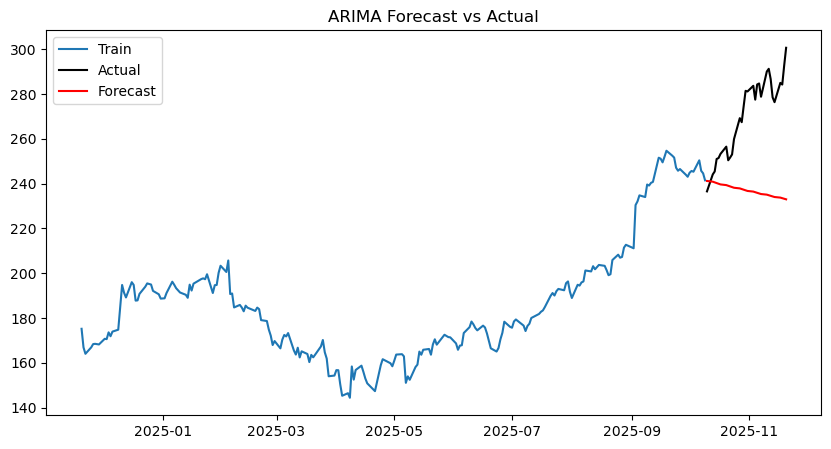

In [25]:
plt.figure(figsize=(10,5))
plt.plot(train.index, train, label="Train")
plt.plot(test.index, test, label="Actual", color="black")
plt.plot(test.index, forecast, label="Forecast", color="red")
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()


In [26]:
mae = mean_absolute_error(test, forecast)
print("MAE:", mae)


MAE: 34.087589148386925
